In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import matplotlib.ticker as mticker 
from numpy import *
from matplotlib.pyplot import *
from iris.analysis import *
from iris.coord_categorisation import * 
from iris.analysis.cartography import * 
from scipy.stats import *
from scipy.stats.mstats import *
from iris import *

import warnings
warnings.filterwarnings("ignore")

fgname = ('/Users/alicebrindley/Downloads/GFDL-ESM-pi-control-annual/outfile')
fgcube = iris.load(fgname)
fgcube3=fgcube[0]


# Extract the region of interst across teh whole cube just once at that start
west = -210 
east = -120 
south = -65
north = -55


fg_temporary_cube = fgcube3.intersection(longitude = (west, east)) 
fgcube4 = fg_temporary_cube.intersection(latitude = (south, north))


def area_avg(cube): 
    try:
        cube.coord('latitude').guess_bounds() 
    except:
        pass 
    try:
        cube.coord('longitude').guess_bounds() 
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)

masked_co2_flux = fgcube4*31536000000
masked_co2_flux_timeseries = area_avg(masked_co2_flux)



In [2]:
print(np.std(masked_co2_flux_timeseries.data))

3.5028966070784584


3.5028966070784584


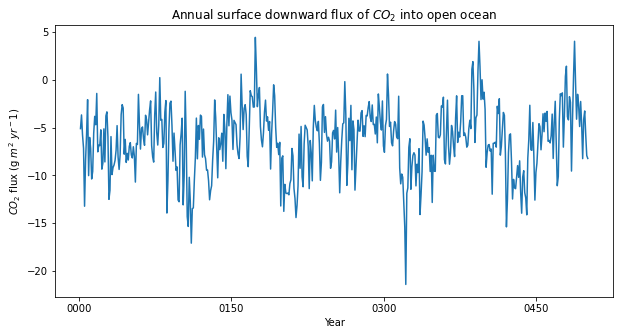

In [3]:
plt.figure(figsize=(10,5)) 
iplt.plot(masked_co2_flux_timeseries,linewidth=1.5) 

plt.ylabel('$CO_2$ flux (g $m^2$ $yr^-1$)') 
plt.xlabel('Year')
plt.title('Annual surface downward flux of $CO_2$ into open ocean')
plt.savefig('open_ocean_flux')

print(np.std(masked_co2_flux_timeseries.data))
plt.savefig('open_ocean_annual')